In [1041]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
import xgboost as xgb
from scipy import sparse
from IPython.display import Image
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set(style="ticks", color_codes=True)
%matplotlib inline
import os
import json
from sklearn.metrics import mean_squared_error
from datetime import datetime
import dateutil
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

random_state=2021


In [1042]:
# dataset = read_all()
df=pd.read_csv('instagram.csv')

C:\Users\jyoti\anaconda3\envs\yourenvname\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6,9,14,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Import Dataset

In [1043]:
dropped = ['caption', 'profile_name', 'profile_image_link', 'biography','id','thumbnails', 'url', 'location','image_url','external_url','media_type','business_email','is_verified']
data = df.drop(dropped,axis=1)
data

,account,following,likes,posts_count,followers,datetime,comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1105.0,NaN,515.0,1244.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,57.0,NaN,8.0,13.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
74544,thesavoylondon,599.0,4079,1933.0,167394.0,1610730000000.0,67
74545,thesavoylondon,599.0,1621,1933.0,167394.0,1610550000000.0,34
74546,thesavoylondon,599.0,1548,1933.0,167394.0,1610370000000.0,28
74547,thesavoylondon,599.0,2637,1933.0,167394.0,1609940000000.0,68


In [1044]:
data = data[data['account'].notna()]

In [1045]:
data

,account,following,likes,posts_count,followers,datetime,comments
10,chelsea_bridge_clinic,964.0,14.0,47.0,1093.0,1612780000000.0,0.0
11,chelsea_bridge_clinic,964.0,12.0,47.0,1093.0,1611240000000.0,0.0
12,numberoneedin,308.0,100.0,343.0,4202.0,1645290000000.0,2.0
13,numberoneedin,308.0,81.0,343.0,4202.0,1643660000000.0,1.0
14,numberoneedin,308.0,146.0,343.0,4202.0,1643220000000.0,1.0
...,...,...,...,...,...,...,...
74544,thesavoylondon,599.0,4079,1933.0,167394.0,1610730000000.0,67
74545,thesavoylondon,599.0,1621,1933.0,167394.0,1610550000000.0,34
74546,thesavoylondon,599.0,1548,1933.0,167394.0,1610370000000.0,28
74547,thesavoylondon,599.0,2637,1933.0,167394.0,1609940000000.0,68


In [1046]:
rm_list = []

for i in range(data.shape[0]):
    if type(data["datetime"].values[i]) != float:
        rm_list.append(i)


len(rm_list)

for i in rm_list:
    data.drop([i], axis=0, inplace=True)

C:\Users\jyoti\anaconda3\envs\yourenvname\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1047]:
#Converting the columns into the float datatype
a=['following','likes','posts_count','followers','comments']
for i in a:
  data[i]= data[i].astype(str).astype(float)
data

C:\Users\jyoti\AppData\Local\Temp/ipykernel_20788/4288282312.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]= data[i].astype(str).astype(float)


,account,following,likes,posts_count,followers,datetime,comments
10,chelsea_bridge_clinic,964.0,14.0,47.0,1093.0,1612780000000.0,0.0
11,chelsea_bridge_clinic,964.0,12.0,47.0,1093.0,1611240000000.0,0.0
12,numberoneedin,308.0,100.0,343.0,4202.0,1645290000000.0,2.0
13,numberoneedin,308.0,81.0,343.0,4202.0,1643660000000.0,1.0
14,numberoneedin,308.0,146.0,343.0,4202.0,1643220000000.0,1.0
...,...,...,...,...,...,...,...
74544,thesavoylondon,599.0,4079.0,1933.0,167394.0,1610730000000.0,67.0
74545,thesavoylondon,599.0,1621.0,1933.0,167394.0,1610550000000.0,34.0
74546,thesavoylondon,599.0,1548.0,1933.0,167394.0,1610370000000.0,28.0
74547,thesavoylondon,599.0,2637.0,1933.0,167394.0,1609940000000.0,68.0


In [1048]:
data['engagement_factor'] =round(data['likes']*data['comments']/data['followers'],2)

C:\Users\jyoti\AppData\Local\Temp/ipykernel_20788/1540921437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['engagement_factor'] =round(data['likes']*data['comments']/data['followers'],2)


In [1049]:
data['datetime'].value_counts()

1.643910e+12    68
1.642530e+12    68
1.644860e+12    64
1.642010e+12    60
1.640430e+12    60
                ..
1.625260e+12     1
1.644720e+12     1
1.614900e+12     1
1.636770e+12     1
1.623900e+12     1
Name: datetime, Length: 3084, dtype: int64

In [1050]:
data.loc[data['datetime'] == 'j_kzvc99wm2q4pjru5kn.f75e5d531a208bf3bdf3435c403835818912c0de.file_kzvfx1gxf4g1f2vj2.image_url.jpg']

,account,following,likes,posts_count,followers,datetime,comments,engagement_factor


In [1051]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 10 to 74548
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   account            41741 non-null  object 
 1   following          41741 non-null  float64
 2   likes              41741 non-null  float64
 3   posts_count        41741 non-null  float64
 4   followers          41741 non-null  float64
 5   datetime           41741 non-null  object 
 6   comments           41741 non-null  float64
 7   engagement_factor  41741 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.9+ MB


In [1052]:
import datetime
def timeStampConversion(x):
    return datetime.datetime.fromtimestamp(int(x)/1000)

In [1053]:
data['datetime'] = pd.to_numeric(data['datetime'], downcast="float")

C:\Users\jyoti\AppData\Local\Temp/ipykernel_20788/2524568235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = pd.to_numeric(data['datetime'], downcast="float")


In [1054]:
data['datetime'] = data['datetime'].apply(lambda x: timeStampConversion(x)) 

C:\Users\jyoti\AppData\Local\Temp/ipykernel_20788/732185493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = data['datetime'].apply(lambda x: timeStampConversion(x))


In [1055]:
data

,account,following,likes,posts_count,followers,datetime,comments,engagement_factor
10,chelsea_bridge_clinic,964.0,14.0,47.0,1093.0,2021-02-08 11:26:51.520,0.0,0.00
11,chelsea_bridge_clinic,964.0,12.0,47.0,1093.0,2021-01-21 15:40:46.592,0.0,0.00
12,numberoneedin,308.0,100.0,343.0,4202.0,2022-02-19 18:01:01.824,2.0,0.05
13,numberoneedin,308.0,81.0,343.0,4202.0,2022-01-31 21:14:10.432,1.0,0.02
14,numberoneedin,308.0,146.0,343.0,4202.0,2022-01-26 19:00:41.728,1.0,0.03
...,...,...,...,...,...,...,...,...
74544,thesavoylondon,599.0,4079.0,1933.0,167394.0,2021-01-15 18:00:45.440,67.0,1.63
74545,thesavoylondon,599.0,1621.0,1933.0,167394.0,2021-01-13 15:59:12.512,34.0,0.33
74546,thesavoylondon,599.0,1548.0,1933.0,167394.0,2021-01-11 13:59:50.656,28.0,0.26
74547,thesavoylondon,599.0,2637.0,1933.0,167394.0,2021-01-06 14:32:23.424,68.0,1.07


In [1056]:
data["datetime"] = pd.to_datetime(data["datetime"])

C:\Users\jyoti\AppData\Local\Temp/ipykernel_20788/3101937265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["datetime"] = pd.to_datetime(data["datetime"])


In [1057]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 10 to 74548
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   account            41741 non-null  object        
 1   following          41741 non-null  float64       
 2   likes              41741 non-null  float64       
 3   posts_count        41741 non-null  float64       
 4   followers          41741 non-null  float64       
 5   datetime           41741 non-null  datetime64[ns]
 6   comments           41741 non-null  float64       
 7   engagement_factor  41741 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 2.9+ MB


In [1058]:
data['Dow'] = data['datetime'].dt.weekday
data['Hod']= data['datetime'].dt.hour
data['Date']= data['datetime'].dt.date

C:\Users\jyoti\AppData\Local\Temp/ipykernel_20788/926169864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dow'] = data['datetime'].dt.weekday
C:\Users\jyoti\AppData\Local\Temp/ipykernel_20788/926169864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hod']= data['datetime'].dt.hour
C:\Users\jyoti\AppData\Local\Temp/ipykernel_20788/926169864.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [1059]:
data

,account,following,likes,posts_count,followers,datetime,comments,engagement_factor,Dow,Hod,Date
10,chelsea_bridge_clinic,964.0,14.0,47.0,1093.0,2021-02-08 11:26:51.520,0.0,0.00,0,11,2021-02-08
11,chelsea_bridge_clinic,964.0,12.0,47.0,1093.0,2021-01-21 15:40:46.592,0.0,0.00,3,15,2021-01-21
12,numberoneedin,308.0,100.0,343.0,4202.0,2022-02-19 18:01:01.824,2.0,0.05,5,18,2022-02-19
13,numberoneedin,308.0,81.0,343.0,4202.0,2022-01-31 21:14:10.432,1.0,0.02,0,21,2022-01-31
14,numberoneedin,308.0,146.0,343.0,4202.0,2022-01-26 19:00:41.728,1.0,0.03,2,19,2022-01-26
...,...,...,...,...,...,...,...,...,...,...,...
74544,thesavoylondon,599.0,4079.0,1933.0,167394.0,2021-01-15 18:00:45.440,67.0,1.63,4,18,2021-01-15
74545,thesavoylondon,599.0,1621.0,1933.0,167394.0,2021-01-13 15:59:12.512,34.0,0.33,2,15,2021-01-13
74546,thesavoylondon,599.0,1548.0,1933.0,167394.0,2021-01-11 13:59:50.656,28.0,0.26,0,13,2021-01-11
74547,thesavoylondon,599.0,2637.0,1933.0,167394.0,2021-01-06 14:32:23.424,68.0,1.07,2,14,2021-01-06


In [1060]:
data['mon']=(data['Dow']==0).astype(int)
data['tue']=(data['Dow']==1).astype(int)
data['wed']=(data['Dow']==2).astype(int)
data['thu']=(data['Dow']==3).astype(int)
data['fri']=(data['Dow']==4).astype(int)
data['sat']=(data['Dow']==5).astype(int)
data['sun']=(data['Dow']==6).astype(int)

C:\Users\jyoti\AppData\Local\Temp/ipykernel_20788/3979566909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mon']=(data['Dow']==0).astype(int)
C:\Users\jyoti\AppData\Local\Temp/ipykernel_20788/3979566909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tue']=(data['Dow']==1).astype(int)
C:\Users\jyoti\AppData\Local\Temp/ipykernel_20788/3979566909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [1061]:
data = data.drop(['Dow'], axis=1)

In [1062]:
data

,account,following,likes,posts_count,followers,datetime,comments,engagement_factor,Hod,Date,mon,tue,wed,thu,fri,sat,sun
10,chelsea_bridge_clinic,964.0,14.0,47.0,1093.0,2021-02-08 11:26:51.520,0.0,0.00,11,2021-02-08,1,0,0,0,0,0,0
11,chelsea_bridge_clinic,964.0,12.0,47.0,1093.0,2021-01-21 15:40:46.592,0.0,0.00,15,2021-01-21,0,0,0,1,0,0,0
12,numberoneedin,308.0,100.0,343.0,4202.0,2022-02-19 18:01:01.824,2.0,0.05,18,2022-02-19,0,0,0,0,0,1,0
13,numberoneedin,308.0,81.0,343.0,4202.0,2022-01-31 21:14:10.432,1.0,0.02,21,2022-01-31,1,0,0,0,0,0,0
14,numberoneedin,308.0,146.0,343.0,4202.0,2022-01-26 19:00:41.728,1.0,0.03,19,2022-01-26,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74544,thesavoylondon,599.0,4079.0,1933.0,167394.0,2021-01-15 18:00:45.440,67.0,1.63,18,2021-01-15,0,0,0,0,1,0,0
74545,thesavoylondon,599.0,1621.0,1933.0,167394.0,2021-01-13 15:59:12.512,34.0,0.33,15,2021-01-13,0,0,1,0,0,0,0
74546,thesavoylondon,599.0,1548.0,1933.0,167394.0,2021-01-11 13:59:50.656,28.0,0.26,13,2021-01-11,1,0,0,0,0,0,0
74547,thesavoylondon,599.0,2637.0,1933.0,167394.0,2021-01-06 14:32:23.424,68.0,1.07,14,2021-01-06,0,0,1,0,0,0,0


In [1063]:
data.drop(['datetime'], axis=1, inplace=True)

In [1064]:
data

,account,following,likes,posts_count,followers,comments,engagement_factor,Hod,Date,mon,tue,wed,thu,fri,sat,sun
10,chelsea_bridge_clinic,964.0,14.0,47.0,1093.0,0.0,0.00,11,2021-02-08,1,0,0,0,0,0,0
11,chelsea_bridge_clinic,964.0,12.0,47.0,1093.0,0.0,0.00,15,2021-01-21,0,0,0,1,0,0,0
12,numberoneedin,308.0,100.0,343.0,4202.0,2.0,0.05,18,2022-02-19,0,0,0,0,0,1,0
13,numberoneedin,308.0,81.0,343.0,4202.0,1.0,0.02,21,2022-01-31,1,0,0,0,0,0,0
14,numberoneedin,308.0,146.0,343.0,4202.0,1.0,0.03,19,2022-01-26,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74544,thesavoylondon,599.0,4079.0,1933.0,167394.0,67.0,1.63,18,2021-01-15,0,0,0,0,1,0,0
74545,thesavoylondon,599.0,1621.0,1933.0,167394.0,34.0,0.33,15,2021-01-13,0,0,1,0,0,0,0
74546,thesavoylondon,599.0,1548.0,1933.0,167394.0,28.0,0.26,13,2021-01-11,1,0,0,0,0,0,0
74547,thesavoylondon,599.0,2637.0,1933.0,167394.0,68.0,1.07,14,2021-01-06,0,0,1,0,0,0,0


In [1065]:
a=df['account'].nunique(dropna = True)

In [1066]:
data1 = data.iloc[:]

In [1067]:
print(data1.shape, data.shape)

(41741, 16) (41741, 16)


In [1068]:
# data1.set_index('account')
data1.head()

,account,following,likes,posts_count,followers,comments,engagement_factor,Hod,Date,mon,tue,wed,thu,fri,sat,sun
10,chelsea_bridge_clinic,964.0,14.0,47.0,1093.0,0.0,0.00,11,2021-02-08,1,0,0,0,0,0,0
11,chelsea_bridge_clinic,964.0,12.0,47.0,1093.0,0.0,0.00,15,2021-01-21,0,0,0,1,0,0,0
12,numberoneedin,308.0,100.0,343.0,4202.0,2.0,0.05,18,2022-02-19,0,0,0,0,0,1,0
13,numberoneedin,308.0,81.0,343.0,4202.0,1.0,0.02,21,2022-01-31,1,0,0,0,0,0,0
14,numberoneedin,308.0,146.0,343.0,4202.0,1.0,0.03,19,2022-01-26,0,0,1,0,0,0,0


In [1069]:
data1.shape

(41741, 16)

In [1070]:
data1[data1['account'] == 0]['likes'].aggregate('mean')

nan

In [1071]:
a = data1.groupby(by = ['account'])['likes'].aggregate('mean').to_frame('avg_likes')
a.head()

,avg_likes
account,
108harleystreet,4.541667
111skin,276.060606
144onthehill,49.250000
1gemmaclare,59.857143
2magpiesbakery,321.625000


In [1072]:
x = pd.merge(data1, a, on = 'account')

In [1073]:
x

,account,following,likes,posts_count,followers,comments,engagement_factor,Hod,Date,mon,tue,wed,thu,fri,sat,sun,avg_likes
0,chelsea_bridge_clinic,964.0,14.0,47.0,1093.0,0.0,0.00,11,2021-02-08,1,0,0,0,0,0,0,13.000000
1,chelsea_bridge_clinic,964.0,12.0,47.0,1093.0,0.0,0.00,15,2021-01-21,0,0,0,1,0,0,0,13.000000
2,numberoneedin,308.0,100.0,343.0,4202.0,2.0,0.05,18,2022-02-19,0,0,0,0,0,1,0,128.125000
3,numberoneedin,308.0,81.0,343.0,4202.0,1.0,0.02,21,2022-01-31,1,0,0,0,0,0,0,128.125000
4,numberoneedin,308.0,146.0,343.0,4202.0,1.0,0.03,19,2022-01-26,0,0,1,0,0,0,0,128.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,royalcrescent_hotel,1290.0,97.0,1118.0,11336.0,0.0,0.00,13,2021-05-31,1,0,0,0,0,0,0,179.297872
41737,royalcrescent_hotel,1290.0,125.0,1118.0,11336.0,2.0,0.02,18,2021-05-28,0,0,0,0,1,0,0,179.297872
41738,royalcrescent_hotel,1290.0,125.0,1118.0,11336.0,1.0,0.01,9,2021-05-27,0,0,0,1,0,0,0,179.297872
41739,royalcrescent_hotel,1290.0,107.0,1118.0,11336.0,6.0,0.06,13,2021-05-26,0,0,1,0,0,0,0,179.297872


In [1074]:
pd.DataFrame(data1.groupby(by=['account'])['likes']).iloc[0][1]

9097     4.0
9098     4.0
9099     3.0
9100     5.0
9101     6.0
9102     8.0
9103     3.0
9104     6.0
9105     5.0
9106     8.0
9107     5.0
9108     2.0
9109     6.0
9110     3.0
9111     6.0
9112     1.0
9113     2.0
9114     4.0
9115     3.0
9116     6.0
9117     3.0
9118     3.0
9119     2.0
9120    11.0
Name: likes, dtype: float64

In [1075]:
recent_likes=data1.groupby(by=['account'])['likes'].apply(lambda x: x.tail(5).mean())

In [1076]:
x = pd.merge(x, recent_likes, on = 'account')

In [1077]:
x.rename({'likes_y': 'average_five_recent_likes'}, axis=1, inplace=True)
x

,account,following,likes_x,posts_count,followers,comments,engagement_factor,Hod,Date,mon,tue,wed,thu,fri,sat,sun,avg_likes,average_five_recent_likes
0,chelsea_bridge_clinic,964.0,14.0,47.0,1093.0,0.0,0.00,11,2021-02-08,1,0,0,0,0,0,0,13.000000,13.0
1,chelsea_bridge_clinic,964.0,12.0,47.0,1093.0,0.0,0.00,15,2021-01-21,0,0,0,1,0,0,0,13.000000,13.0
2,numberoneedin,308.0,100.0,343.0,4202.0,2.0,0.05,18,2022-02-19,0,0,0,0,0,1,0,128.125000,158.6
3,numberoneedin,308.0,81.0,343.0,4202.0,1.0,0.02,21,2022-01-31,1,0,0,0,0,0,0,128.125000,158.6
4,numberoneedin,308.0,146.0,343.0,4202.0,1.0,0.03,19,2022-01-26,0,0,1,0,0,0,0,128.125000,158.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,royalcrescent_hotel,1290.0,97.0,1118.0,11336.0,0.0,0.00,13,2021-05-31,1,0,0,0,0,0,0,179.297872,121.2
41737,royalcrescent_hotel,1290.0,125.0,1118.0,11336.0,2.0,0.02,18,2021-05-28,0,0,0,0,1,0,0,179.297872,121.2
41738,royalcrescent_hotel,1290.0,125.0,1118.0,11336.0,1.0,0.01,9,2021-05-27,0,0,0,1,0,0,0,179.297872,121.2
41739,royalcrescent_hotel,1290.0,107.0,1118.0,11336.0,6.0,0.06,13,2021-05-26,0,0,1,0,0,0,0,179.297872,121.2


In [1078]:
data=x

In [1079]:
data.shape

(41741, 18)

In [1081]:
le = preprocessing.LabelEncoder()
le.fit(data["account"])
list(le.classes_)
account_num=le.transform(data["account"])
data["account"]=account_num

In [1082]:
data

,account,following,likes_x,posts_count,followers,comments,engagement_factor,Hod,Date,mon,tue,wed,thu,fri,sat,sun,avg_likes,average_five_recent_likes
0,98,964.0,14.0,47.0,1093.0,0.0,0.00,11,2021-02-08,1,0,0,0,0,0,0,13.000000,13.0
1,98,964.0,12.0,47.0,1093.0,0.0,0.00,15,2021-01-21,0,0,0,1,0,0,0,13.000000,13.0
2,416,308.0,100.0,343.0,4202.0,2.0,0.05,18,2022-02-19,0,0,0,0,0,1,0,128.125000,158.6
3,416,308.0,81.0,343.0,4202.0,1.0,0.02,21,2022-01-31,1,0,0,0,0,0,0,128.125000,158.6
4,416,308.0,146.0,343.0,4202.0,1.0,0.03,19,2022-01-26,0,0,1,0,0,0,0,128.125000,158.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,471,1290.0,97.0,1118.0,11336.0,0.0,0.00,13,2021-05-31,1,0,0,0,0,0,0,179.297872,121.2
41737,471,1290.0,125.0,1118.0,11336.0,2.0,0.02,18,2021-05-28,0,0,0,0,1,0,0,179.297872,121.2
41738,471,1290.0,125.0,1118.0,11336.0,1.0,0.01,9,2021-05-27,0,0,0,1,0,0,0,179.297872,121.2
41739,471,1290.0,107.0,1118.0,11336.0,6.0,0.06,13,2021-05-26,0,0,1,0,0,0,0,179.297872,121.2


In [1083]:
data.drop(['comments'], axis=1, inplace=True)

In [1084]:
data.drop(['Date'], axis=1, inplace=True)

In [1085]:
y=data["likes_x"]
X = data.drop('likes_x', axis=1)

In [1086]:
X.shape

(41741, 15)

# Create train and test dataset

In [1087]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [1088]:
type(X_train)

pandas.core.frame.DataFrame

In [1089]:
#Converting the columns into the float datatype
a=['account','following','posts_count','engagement_factor','engagement_factor','Hod','mon','tue','wed','thu','fri','sat','sun','avg_likes','average_five_recent_likes']
for i in a:
  data[i]= data[i].astype(str).astype(float)
data

,account,following,likes_x,posts_count,followers,engagement_factor,Hod,mon,tue,wed,thu,fri,sat,sun,avg_likes,average_five_recent_likes
0,98.0,964.0,14.0,47.0,1093.0,0.00,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.000000,13.0
1,98.0,964.0,12.0,47.0,1093.0,0.00,15.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.000000,13.0
2,416.0,308.0,100.0,343.0,4202.0,0.05,18.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,128.125000,158.6
3,416.0,308.0,81.0,343.0,4202.0,0.02,21.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,128.125000,158.6
4,416.0,308.0,146.0,343.0,4202.0,0.03,19.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,128.125000,158.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,471.0,1290.0,97.0,1118.0,11336.0,0.00,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,179.297872,121.2
41737,471.0,1290.0,125.0,1118.0,11336.0,0.02,18.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,179.297872,121.2
41738,471.0,1290.0,125.0,1118.0,11336.0,0.01,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,179.297872,121.2
41739,471.0,1290.0,107.0,1118.0,11336.0,0.06,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,179.297872,121.2


In [1090]:
from sklearn import preprocessing

normalizer = preprocessing.MinMaxScaler()
normalized_train_X = pd.DataFrame(normalizer.fit_transform(X_train),  columns = X_train.columns)
normalized_train_X.shape

(33392, 15)

In [1091]:
normalized_train_X

,account,following,posts_count,followers,engagement_factor,Hod,mon,tue,wed,thu,fri,sat,sun,avg_likes,average_five_recent_likes
0,0.627512,0.220400,0.188979,0.015894,0.000000,0.130435,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.004837,0.003590
1,0.601236,0.014800,0.425645,0.063143,0.000000,0.652174,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.049765,0.023241
2,0.366306,0.066133,0.066231,0.015567,0.000022,0.521739,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.025477,0.025717
3,0.862442,0.594800,0.242317,0.115537,0.000016,0.782609,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.157907,0.153903
4,0.724884,0.088400,0.114800,0.053135,0.000029,0.826087,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.058121,0.047257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33387,0.534776,0.054533,0.166549,0.009490,0.000006,0.478261,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008988,0.006217
33388,0.276662,0.403467,0.046803,0.040479,0.000000,0.347826,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.009681,0.008031
33389,0.321484,0.015467,0.007771,0.001138,0.000000,0.869565,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.006439,0.002211
33390,0.055641,0.089333,0.025433,0.001948,0.000035,0.347826,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008530,0.004138


In [1092]:
normalized_train_X.dtypes

account                      float64
following                    float64
posts_count                  float64
followers                    float64
engagement_factor            float64
Hod                          float64
mon                          float64
tue                          float64
wed                          float64
thu                          float64
fri                          float64
sat                          float64
sun                          float64
avg_likes                    float64
average_five_recent_likes    float64
dtype: object

In [1093]:
y_train.dtype

dtype('float64')

In [1094]:
# y=y_train.values

normalized_train_y=pd.DataFrame(normalizer.fit_transform(y_train.values.reshape(-1,1)))
normalized_train_y

,0
0,0.000863
1,0.015253
2,0.005948
3,0.019234
4,0.015253
...,...
33387,0.003981
33388,0.005276
33389,0.000719
33390,0.002878


In [1095]:
normalized_test_X = pd.DataFrame(normalizer.fit_transform(X_test),  columns = X_test.columns)
normalized_test_X.shape

(8349, 15)

In [1096]:
normalized_test_X

,account,following,posts_count,followers,engagement_factor,Hod,mon,tue,wed,thu,fri,sat,sun,avg_likes,average_five_recent_likes
0,0.687790,0.035467,0.090829,0.041333,0.000004,0.826087,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.041855,0.029234
1,0.559505,0.492933,0.458031,0.045285,0.000404,0.608696,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.005430,0.003383
2,0.698609,0.196667,0.154621,0.158784,0.000033,0.391304,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.271753,0.145130
3,0.922720,0.080400,0.264888,0.323717,0.000023,0.869565,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.391737,0.311350
4,0.098918,0.094267,0.027213,0.000483,0.000000,0.521739,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000225,0.000170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8344,0.369397,0.336800,0.032868,0.008258,0.000007,0.695652,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.016139,0.014211
8345,0.149923,0.125333,0.153561,0.018112,0.000004,0.956522,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.026358,0.010998
8346,0.381762,0.080133,0.048065,0.010075,0.000001,0.826087,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.004926,0.002532
8347,0.163833,0.062800,0.179007,0.030756,0.000000,0.695652,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.003791,0.003458


In [1097]:
# y_=y_test.values

normalized_test_y=pd.DataFrame(normalizer.fit_transform(y_test.values.reshape(-1,1)))
normalized_test_y

,0
0,0.006103
1,0.013744
2,0.117279
3,0.079389
4,0.000106
...,...
8344,0.006156
8345,0.006156
8346,0.001910
8347,0.003715


##XG Boost Model

###Hyperparameter Tuning

In [1098]:
from sklearn.model_selection import GridSearchCV

model = xgb.XGBRegressor()
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

model_grid = GridSearchCV(model,parameters,cv = 2,n_jobs = 5, verbose=True)

model_grid.fit(normalized_train_X, normalized_train_y)

model_grid.best_score_
model_grid.best_params_

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[21:49:55] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:49:55] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

##XGBRegressor with plot importance

In [1099]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.03,
                max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,silent=1,subsample=0.7)

In [1100]:
xg_reg.fit(normalized_train_X, normalized_train_y)
y_pred = xg_reg.predict(normalized_test_X)

[21:50:19] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[21:50:19] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [1101]:
y_pred.shape

(8349,)

In [1102]:
pd.DataFrame(normalizer.inverse_transform(y_pred[:].reshape(-1,1)))

,0
0,140.791992
1,510.110626
2,1112.664429
3,1010.804749
4,4.083399
...,...
8344,63.201576
8345,75.919006
8346,18.897667
8347,23.865507


In [1103]:
y_pred_=pd.DataFrame(normalizer.inverse_transform(y_pred[:].reshape(-1,1)))

y_pred_

,0
0,140.791992
1,510.110626
2,1112.664429
3,1010.804749
4,4.083399
...,...
8344,63.201576
8345,75.919006
8346,18.897667
8347,23.865507


In [1104]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_))
print("RMSE: %f" % (rmse))

R2=r2_score(y_test,y_pred_)
print("R2 Score: %f" % (R2))
print()

RMSE: 447.224618
R2 Score: 0.759486



#Random Forest

##Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

model_rand = RandomForestRegressor()


n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator = model_rand,param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)


rf_random.fit(normalized_train_X, normalized_train_y)

# model_rand.best_score_
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

In [930]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}  



In [1012]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split='10', min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(normalized_train_X, normalized_train_y)
y_pred_rnd_clf = rnd_clf.predict(normalized_test_X)

C:\Users\jyoti\AppData\Local\Temp/ipykernel_20788/1493933213.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(normalized_train_X, normalized_train_y)


TypeError: '<' not supported between instances of 'float' and 'str'

In [1105]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

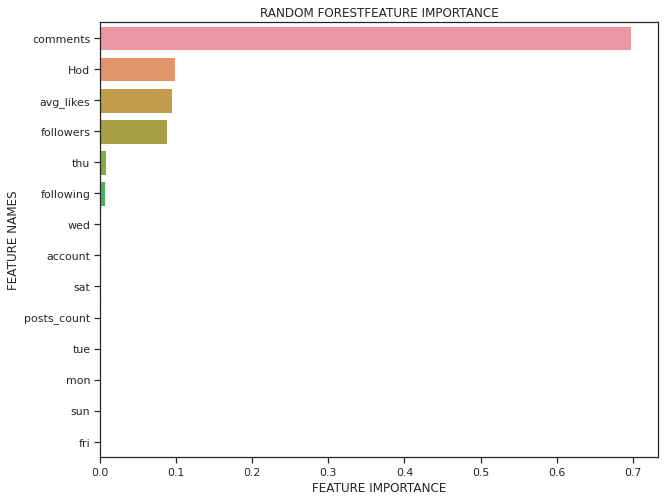

In [ ]:
plot_feature_importance(rnd_clf.feature_importances_,X_train.columns,'RANDOM FOREST')

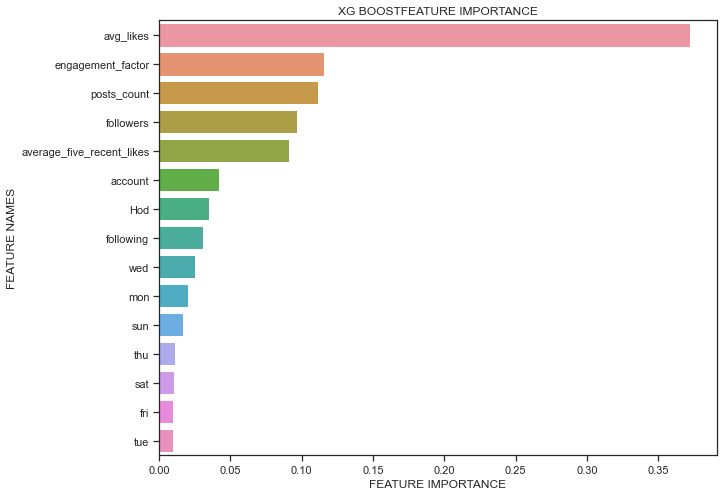

In [1106]:
plot_feature_importance(xg_reg.feature_importances_,X_train.columns,'XG BOOST')

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rnd_clf))
print("RMSE: %f" % (rmse))

R2=r2_score(y_test,y_pred_rnd_clf)
print("R2 Score: %f" % (R2))
print()

NameError: name 'y_pred_rnd_clf' is not defined